 # Projet numérique : équations de LOKTA-VOLTERRA

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
#plt.ioff() 


## Question 1

A rédiger

## Question 2

In [6]:
# Choix des paramètres (cohérents avec leur signification ?)

alpha = 2/3
beta = 4/3
gamma = 1
delta = 1
#alpha = 1.5
#beta = 0.3
#gamma = 0.1
#delta = 1.2

nb_max = 3 # bonne échelle, cf wikipedia, en milliers
nb_tot = 20

def lk(x1, x2):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma-delta*x1)])

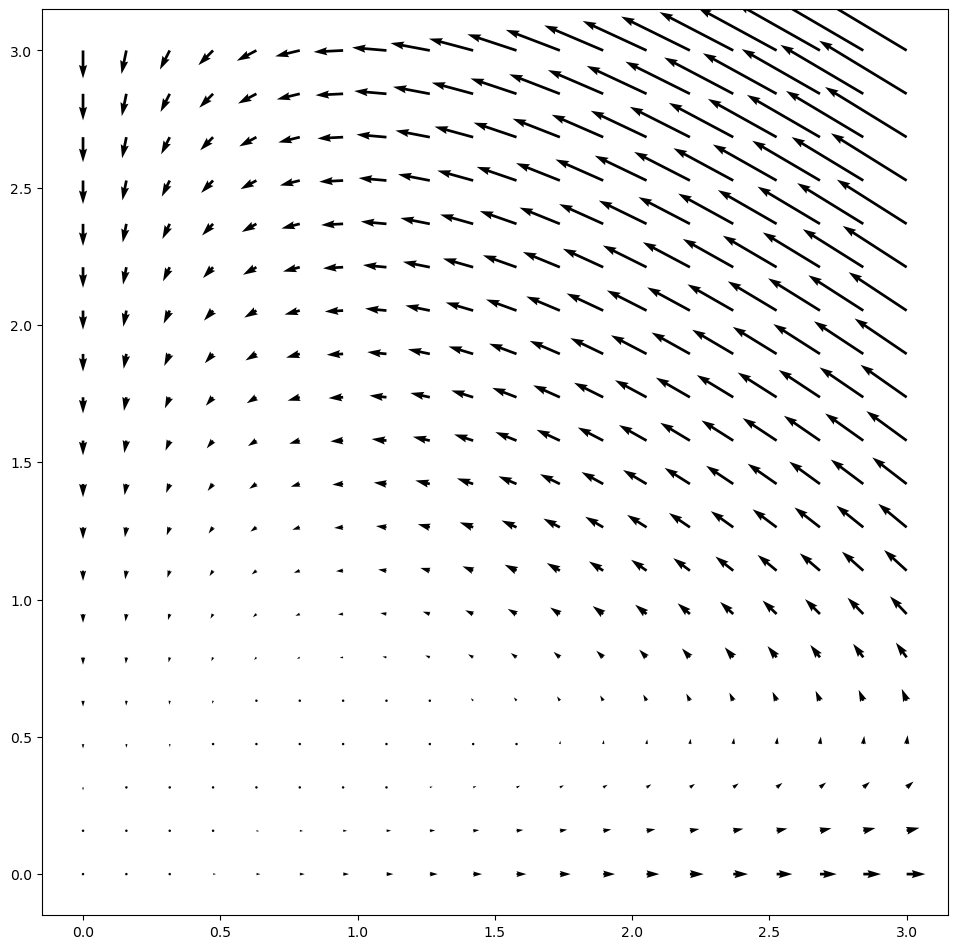

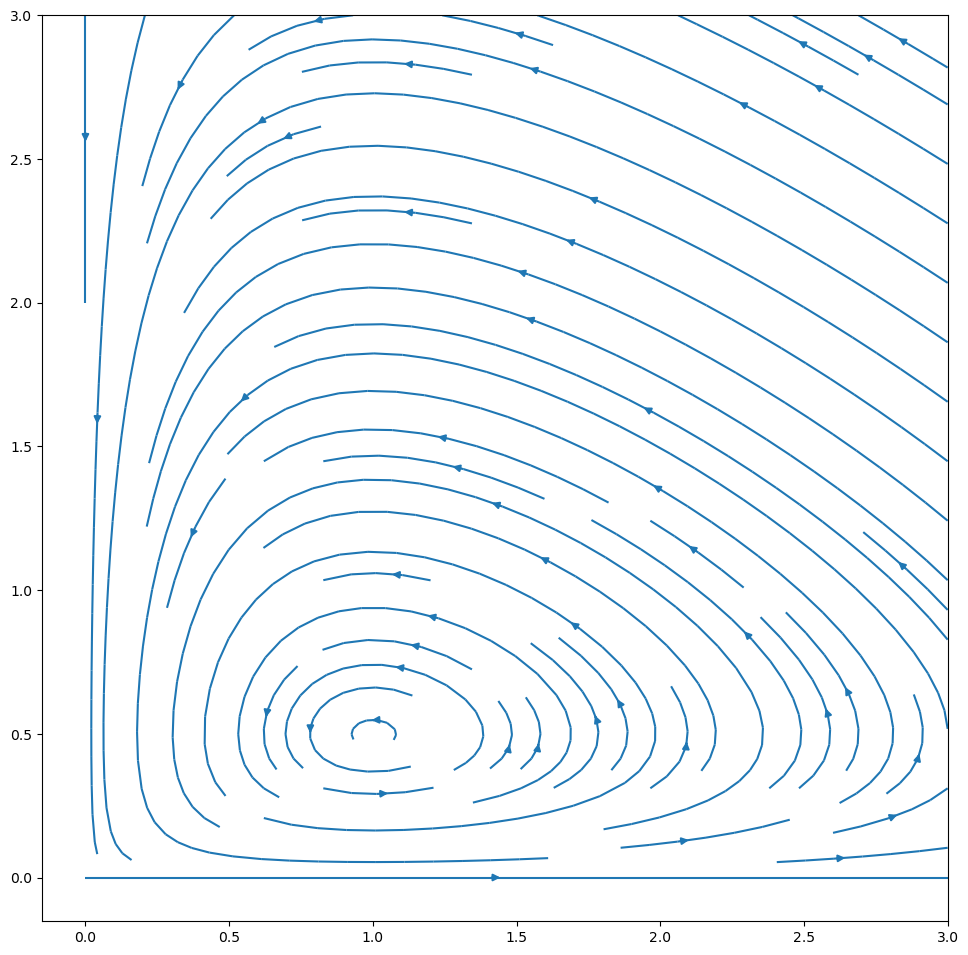

In [7]:
x = np.linspace(0, nb_max, nb_tot)
y = np.linspace(0, nb_max, nb_tot)
X,Y = np.meshgrid(x,y)
fX,fY = lk(X,Y)
fig, ax = plt.subplots()
ax.set_aspect('equal')
q = ax.quiver(X, Y, fX, fY)
fig2, ax2 = plt.subplots()
ax2.set_aspect('equal')
q2 = ax2.streamplot(X, Y, fX, fY);

## Question 5

In [8]:
def h(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

In [9]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

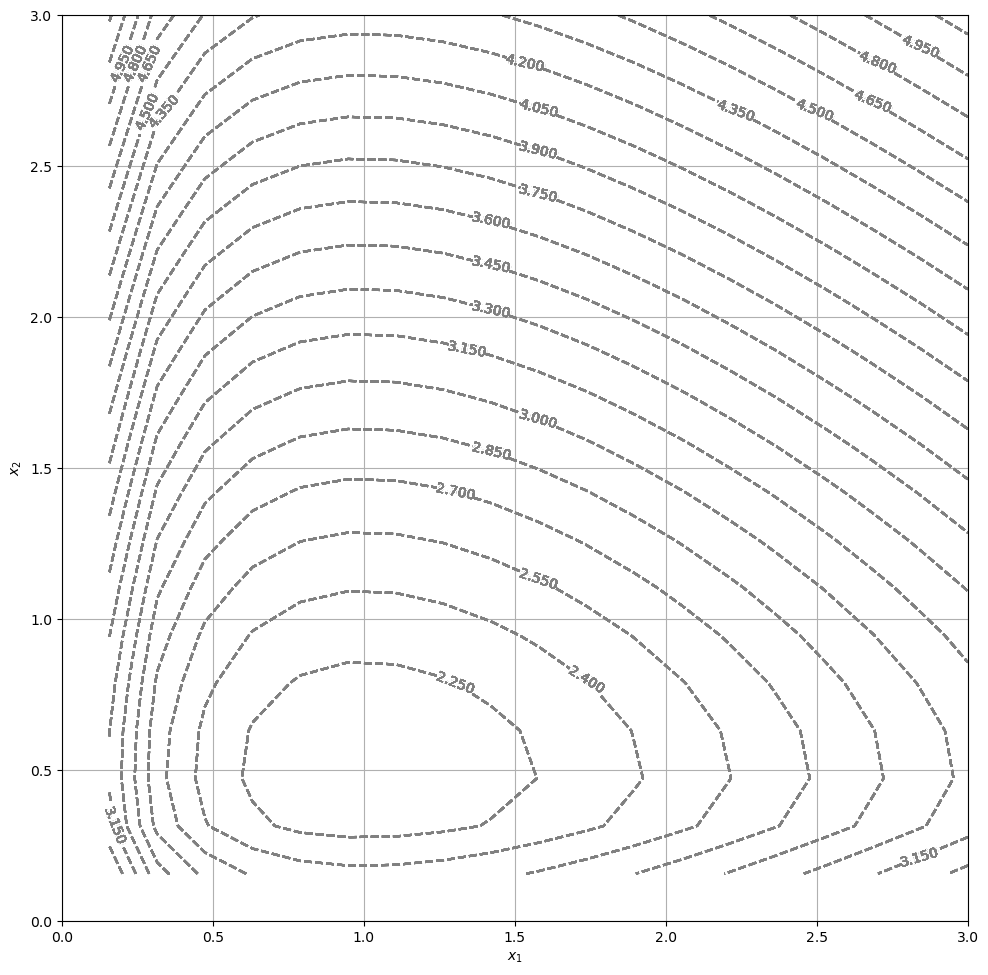

In [10]:
display_contour(h, X, Y, 30);

## Question 6

In [11]:
def solve_euler_explicit(f, x0, dt, t0, tf): # si pas multiple, s'arrête avant tf ? temps final exclut ?? pour l'instant oui
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for tps in t[:-1]:
        x.append(x[-1] + dt*f(tps, x[-1]))
    return t, x

1.0
1
148.4131591025766
149.3805636844768


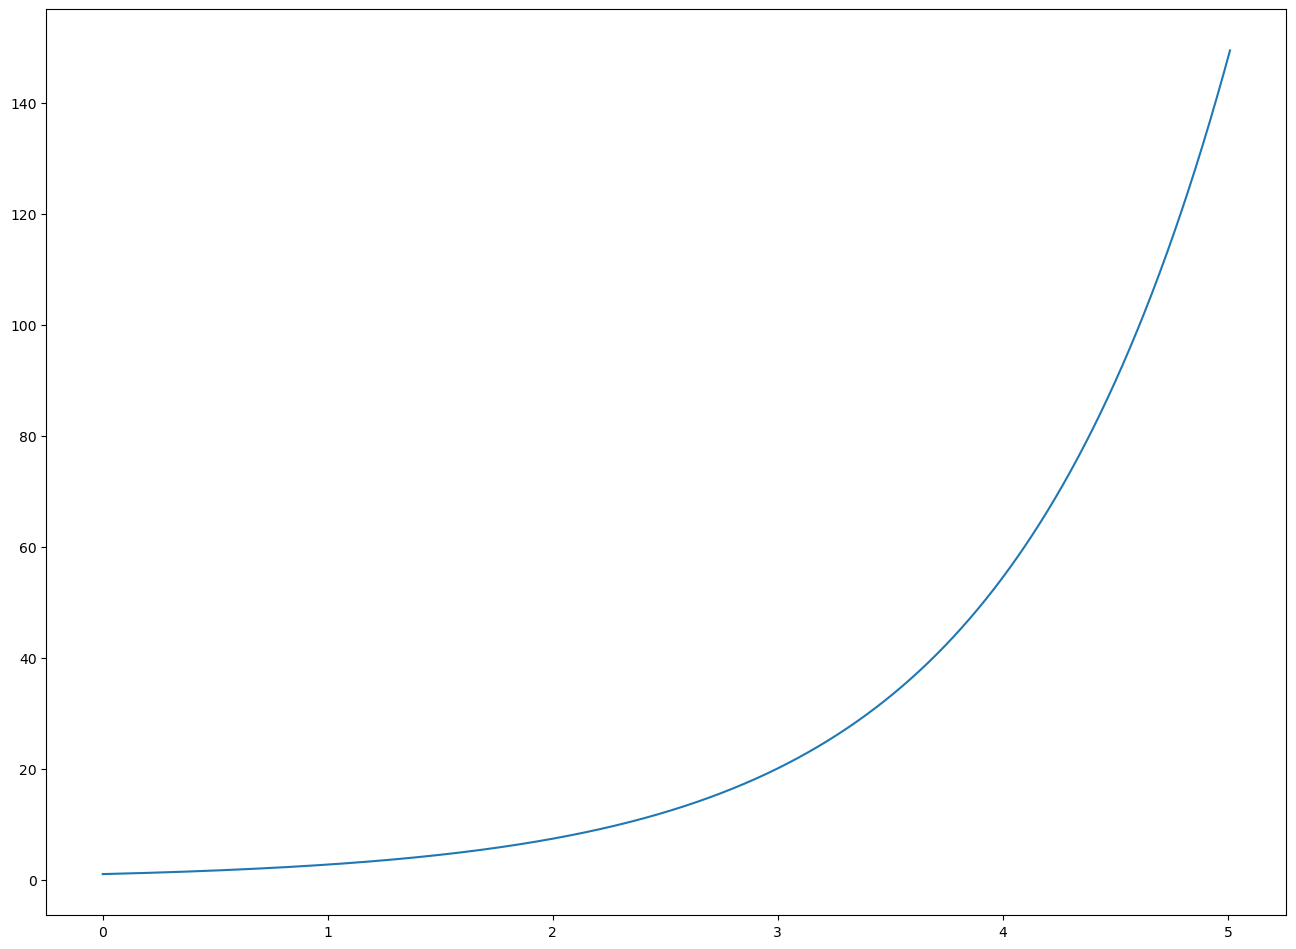

In [12]:
def f_exp(t, x):
    return x

t, x = solve_euler_explicit(f_exp, 1, 0.001, 0, 5.01) #x0 = 0 ne fonctionne pas ?
#0.1  : idée
#0.01 : plus proche : vérifier convergence comment ?
#0.001  plus correct MS diverge toujours
# après : erreur ne diminue plus ?, voire même augmente ???
#ne converge pas vraiment ?
print(np.exp(0))
print(x[0])
print(np.exp(5))
print(x[-1])
plt.plot(t, x);

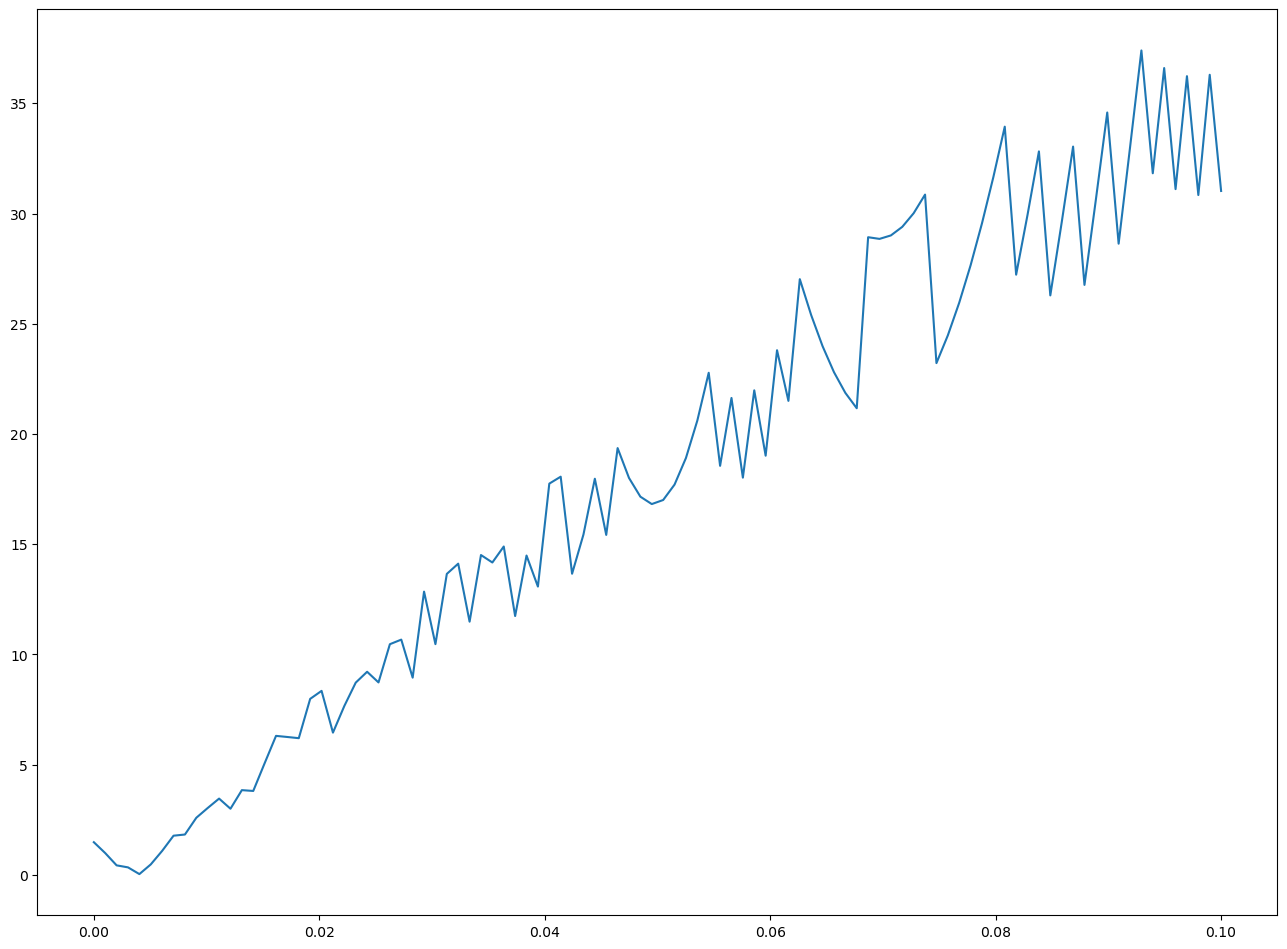

In [13]:
p = np.linspace(0.00001,0.1,100)
d = []
e = np.exp(5)

for ptmp in p:
    d.append(np.abs(e - solve_euler_explicit(f_exp, 1, ptmp, 0, 5.01)[-1][-1]))

plt.plot(p, d); # doit obtenir droite


## Question 7

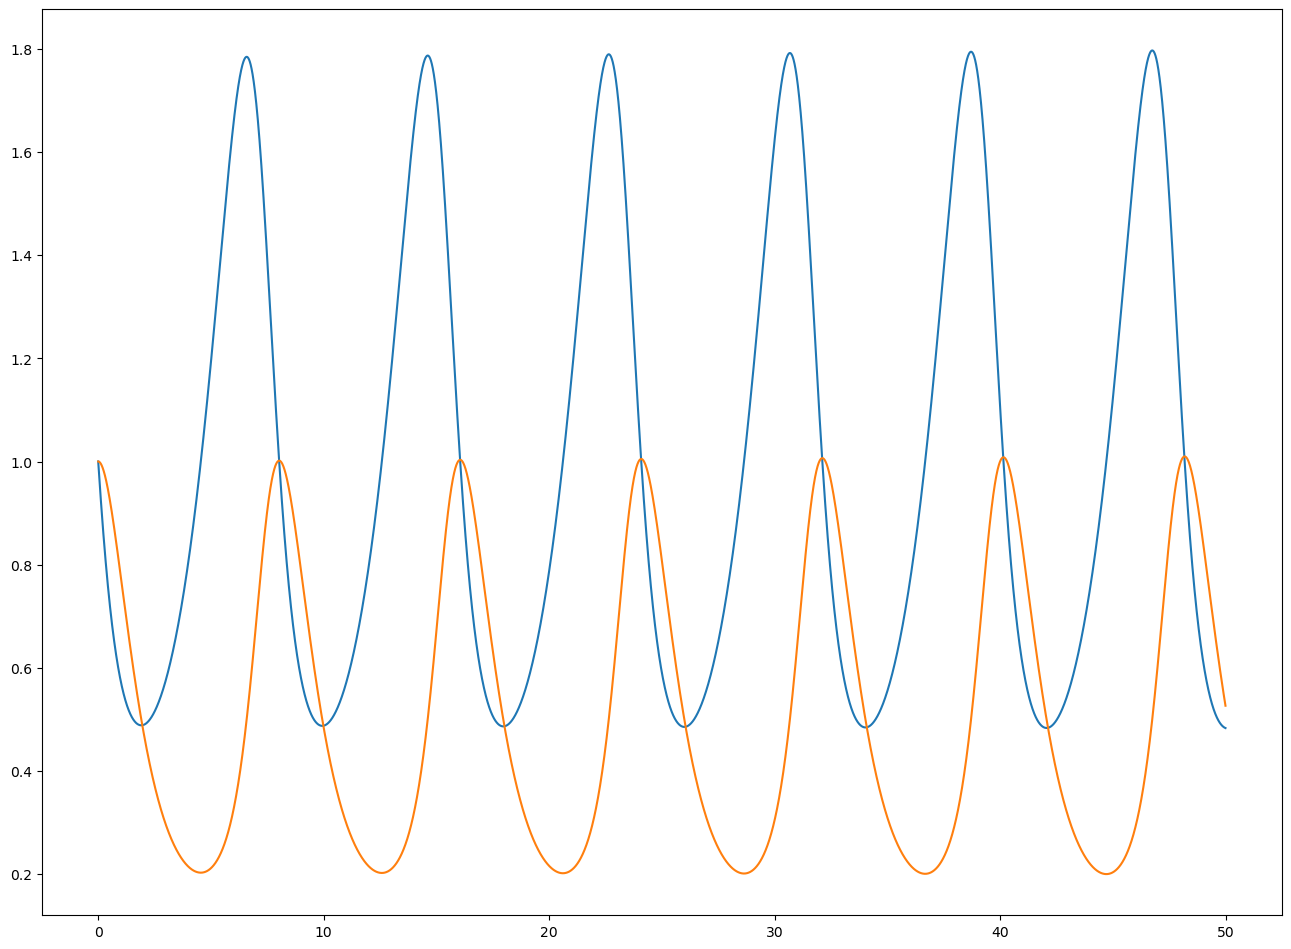

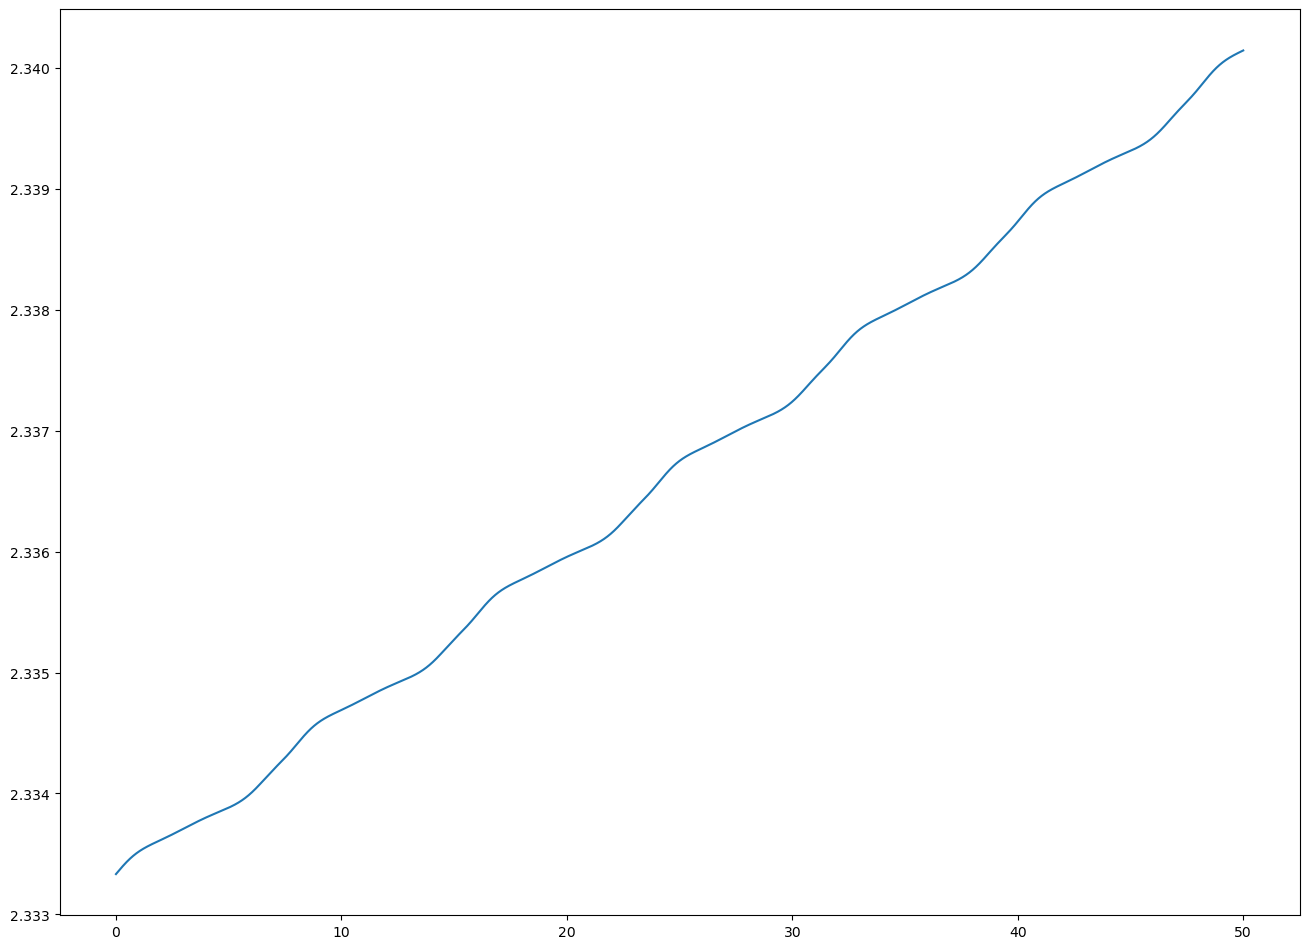

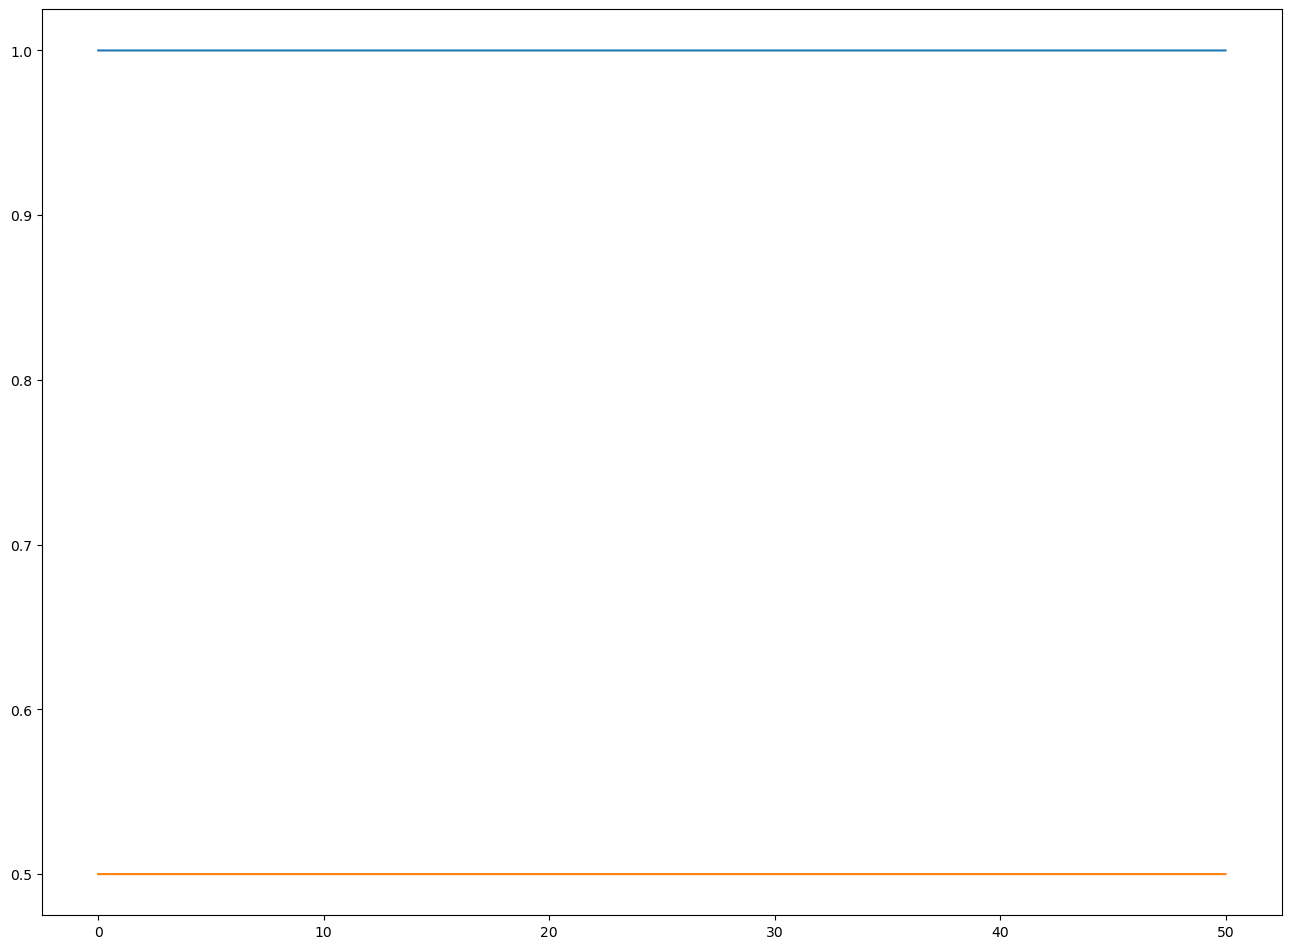

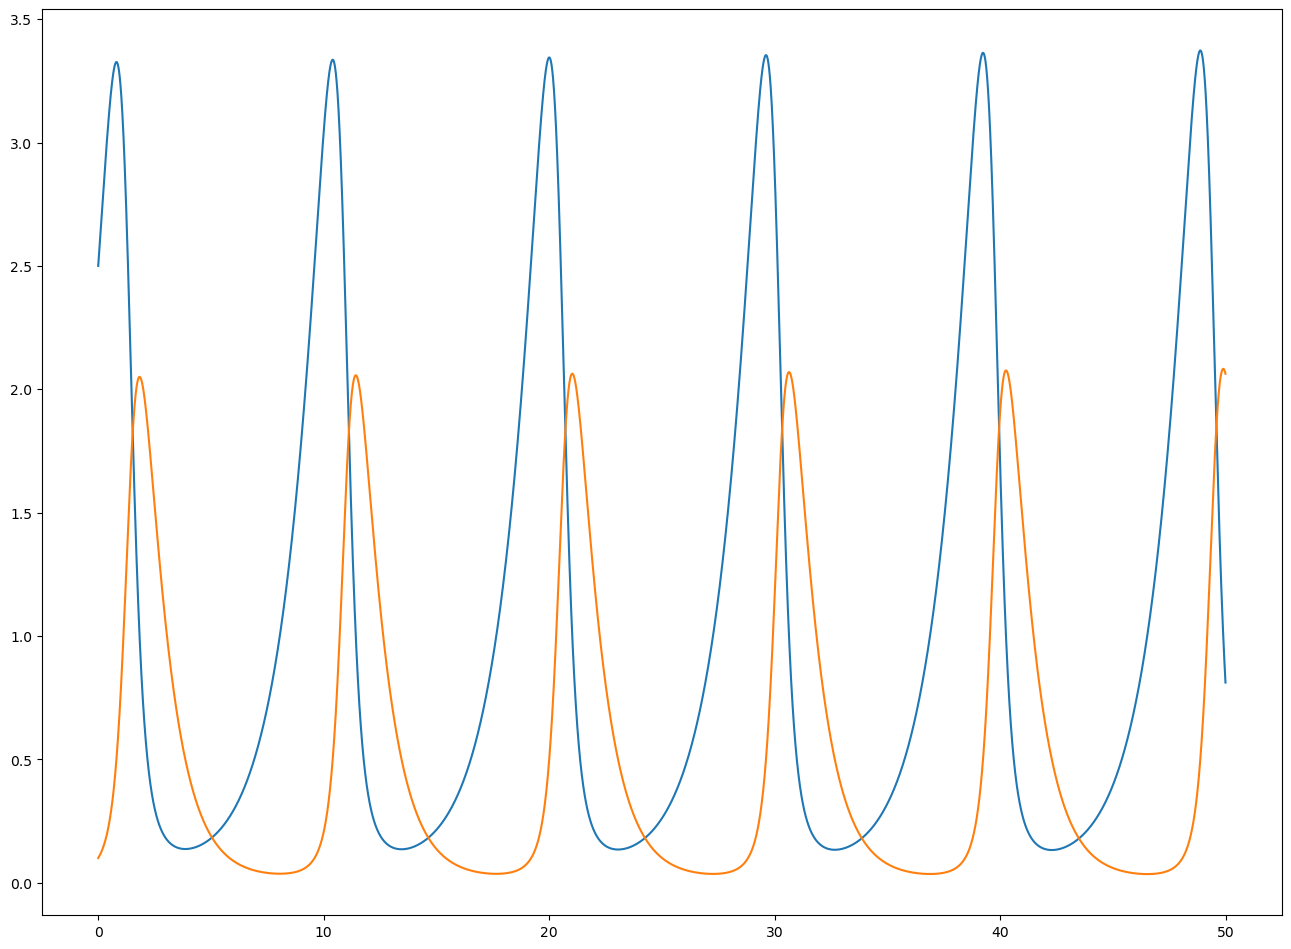

In [14]:
## va diverger en temps long ? 
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,1.0], 0.001, 0.0, 50)
plt.plot(t, x);

plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,0.5], 0.001, 0.0, 50) # point fixe
plt.plot(t, x);

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.001, 0.0, 50) # point fixe
plt.plot(t, x);

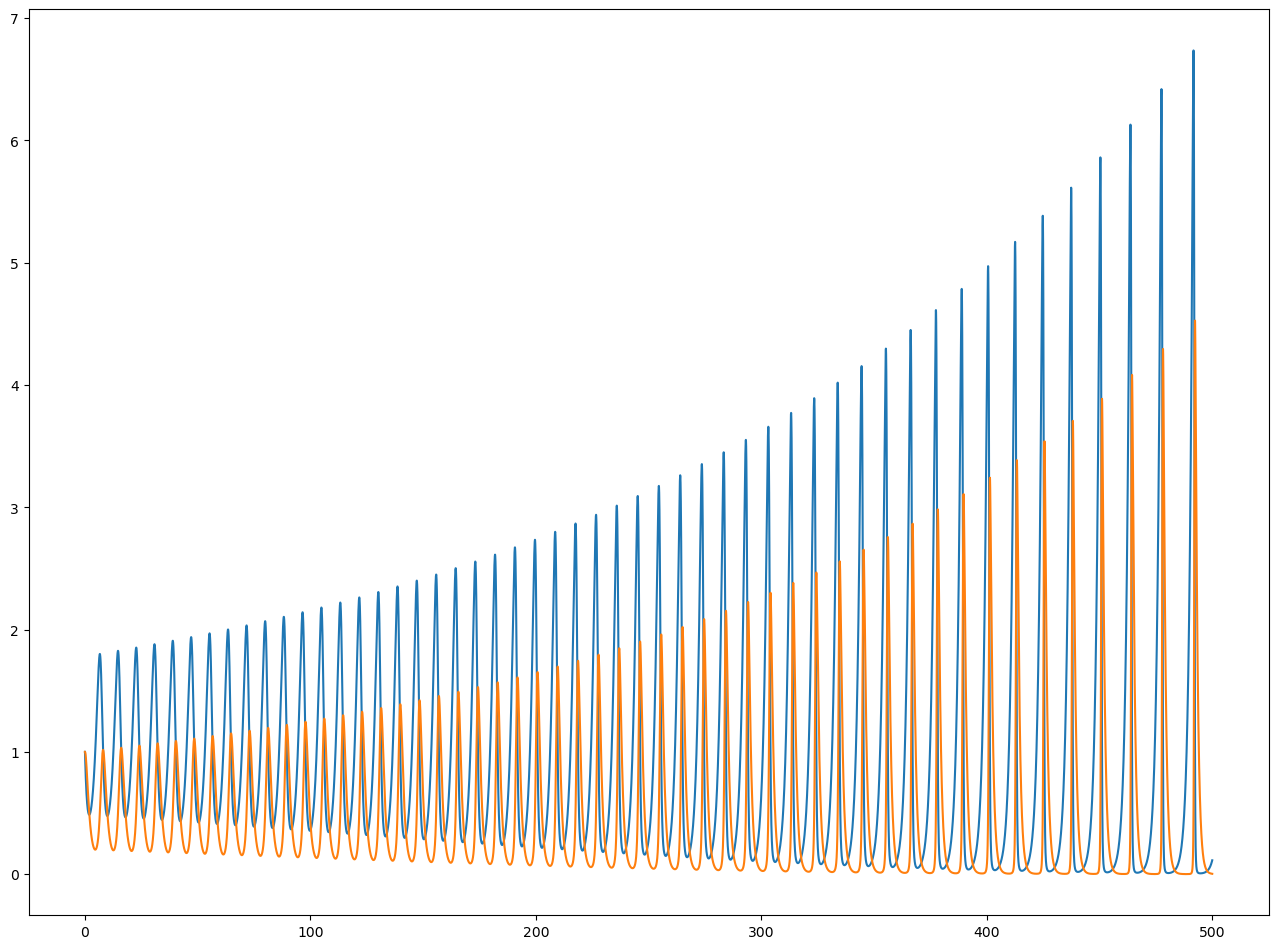

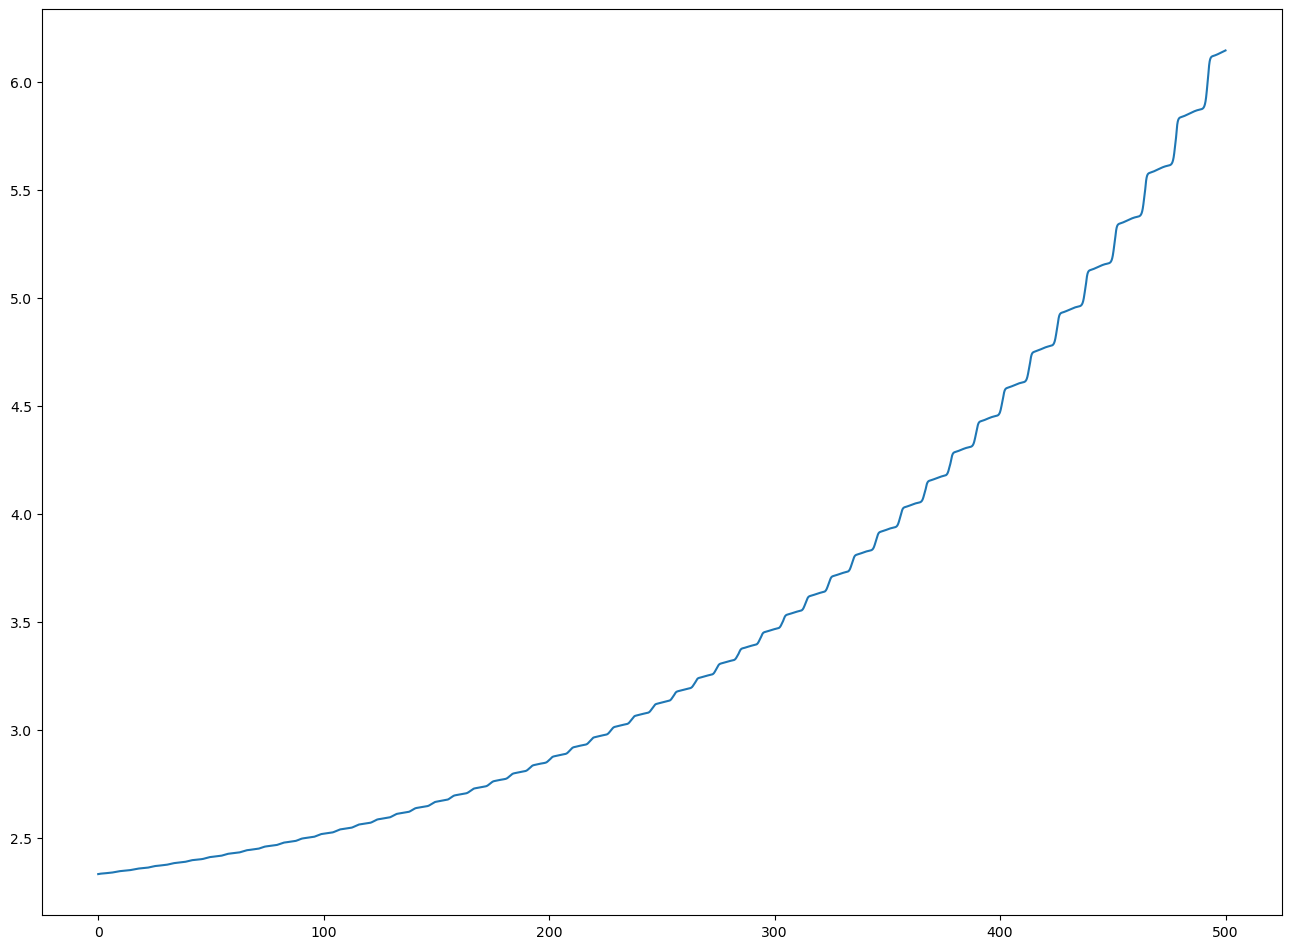

In [15]:
# Temps long

t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,1.0], 0.01, 0.0, 500) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante
# semble non borné, diverger : contradictoire

In [16]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        x_exp = (x[-1] + dt*f(tps, x[-1]))
        for _ in range(itermax):
            x_exp = x[-1] + dt*f(t[i+1], x_exp)
        x.append(x_exp)
    return t, x

# p 8 implicite ?
#seuil utilisateur ou iter_max

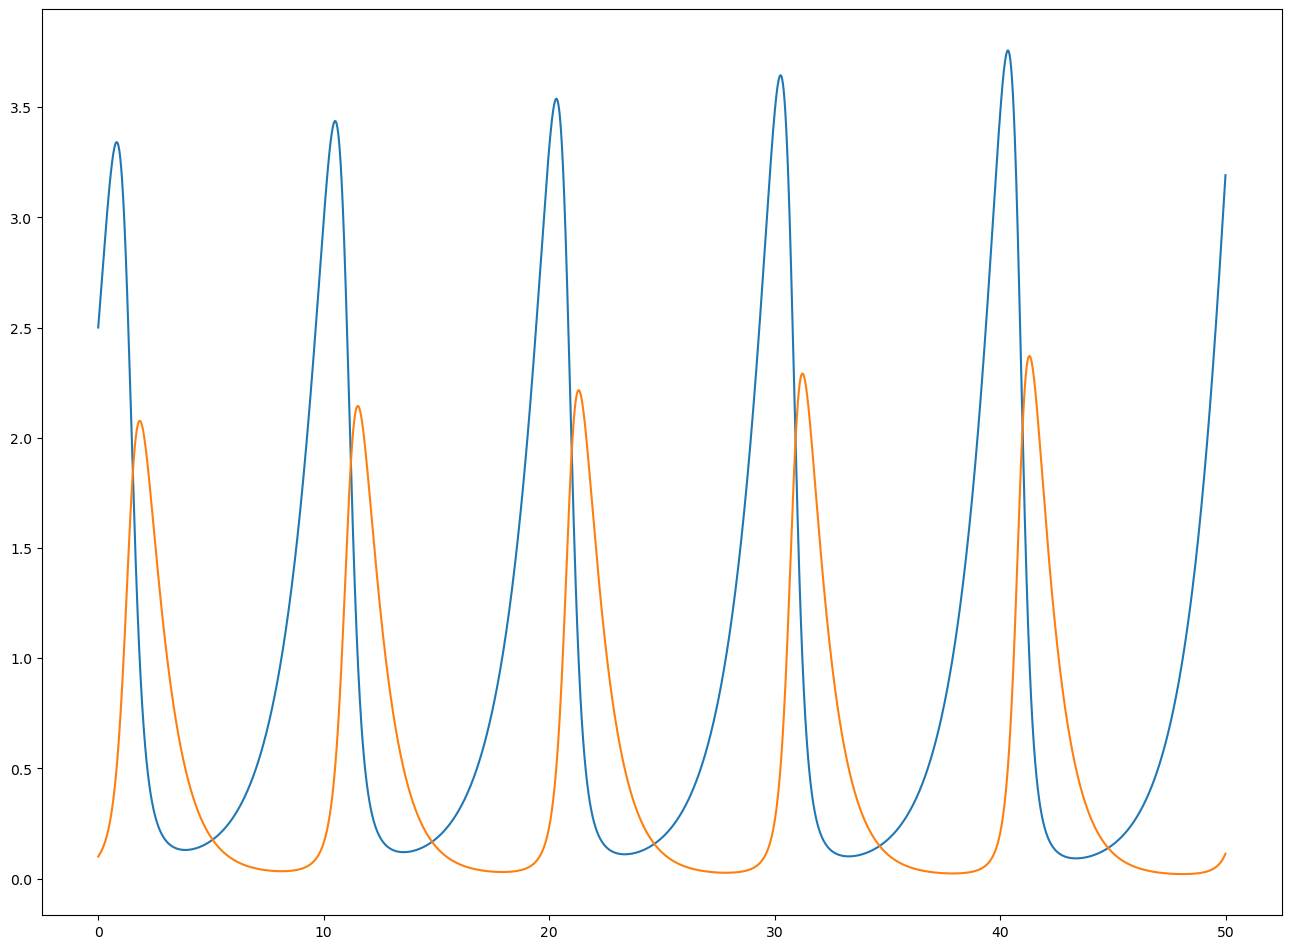

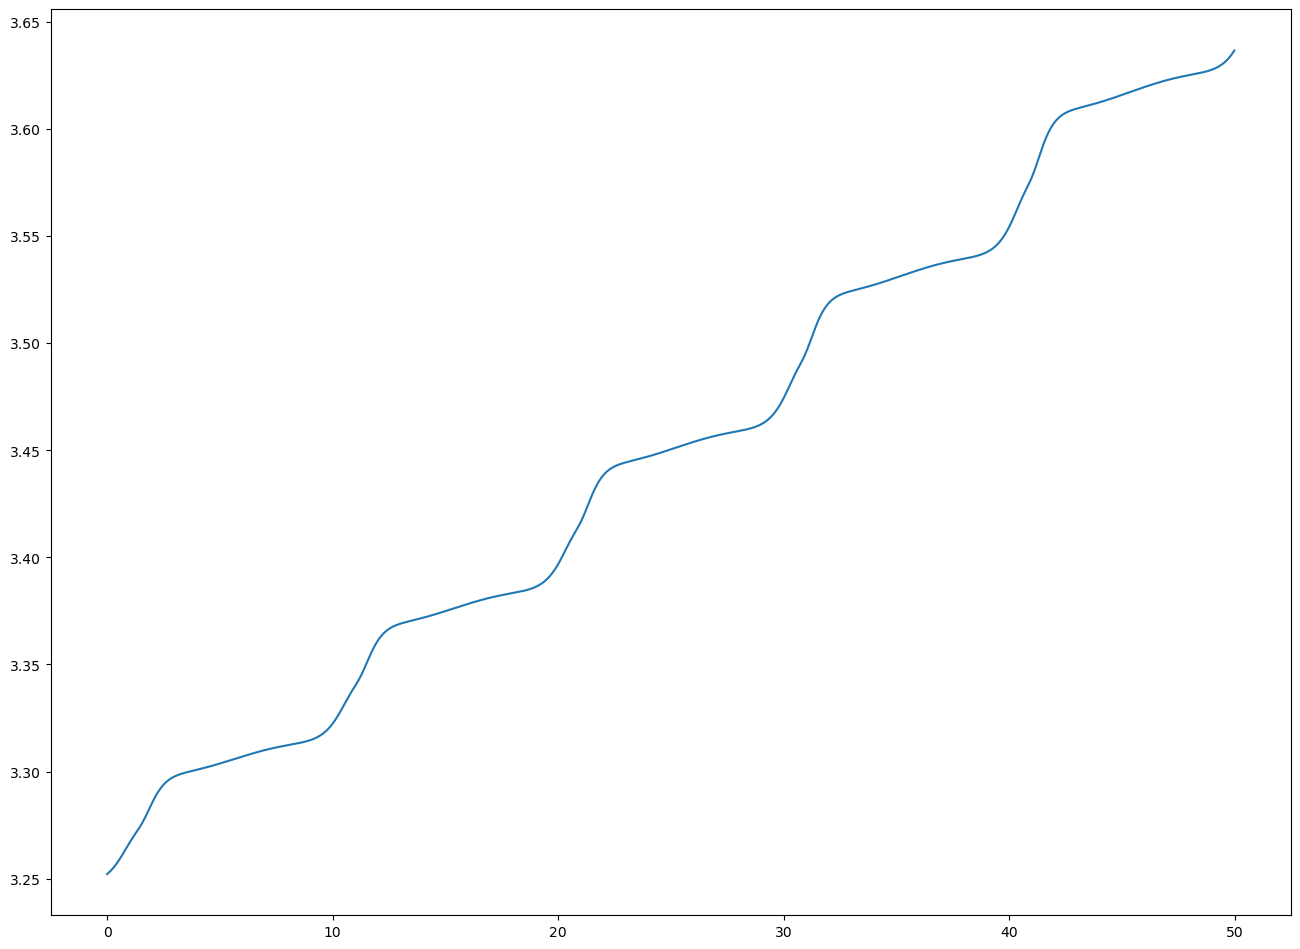

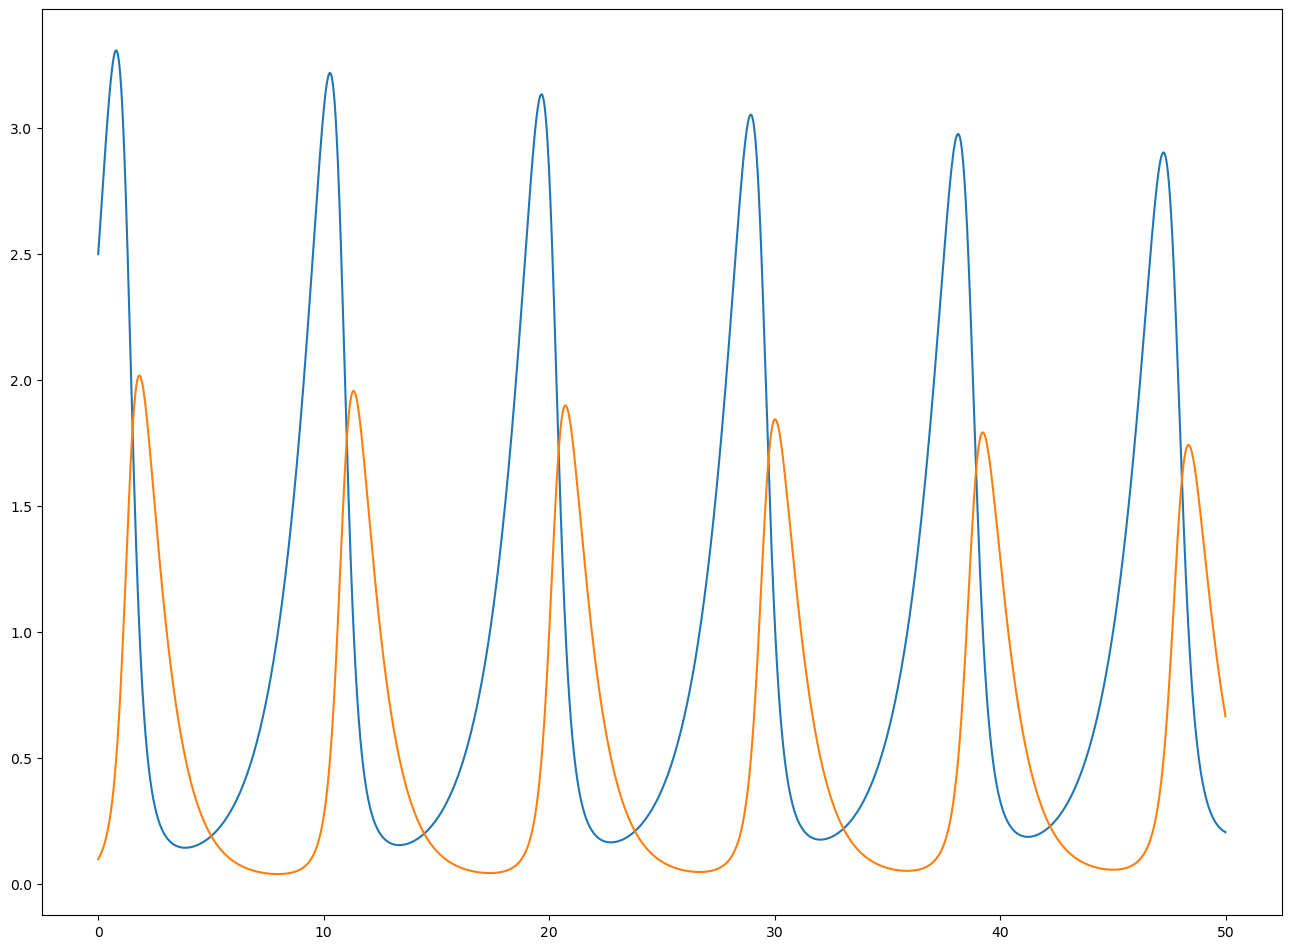

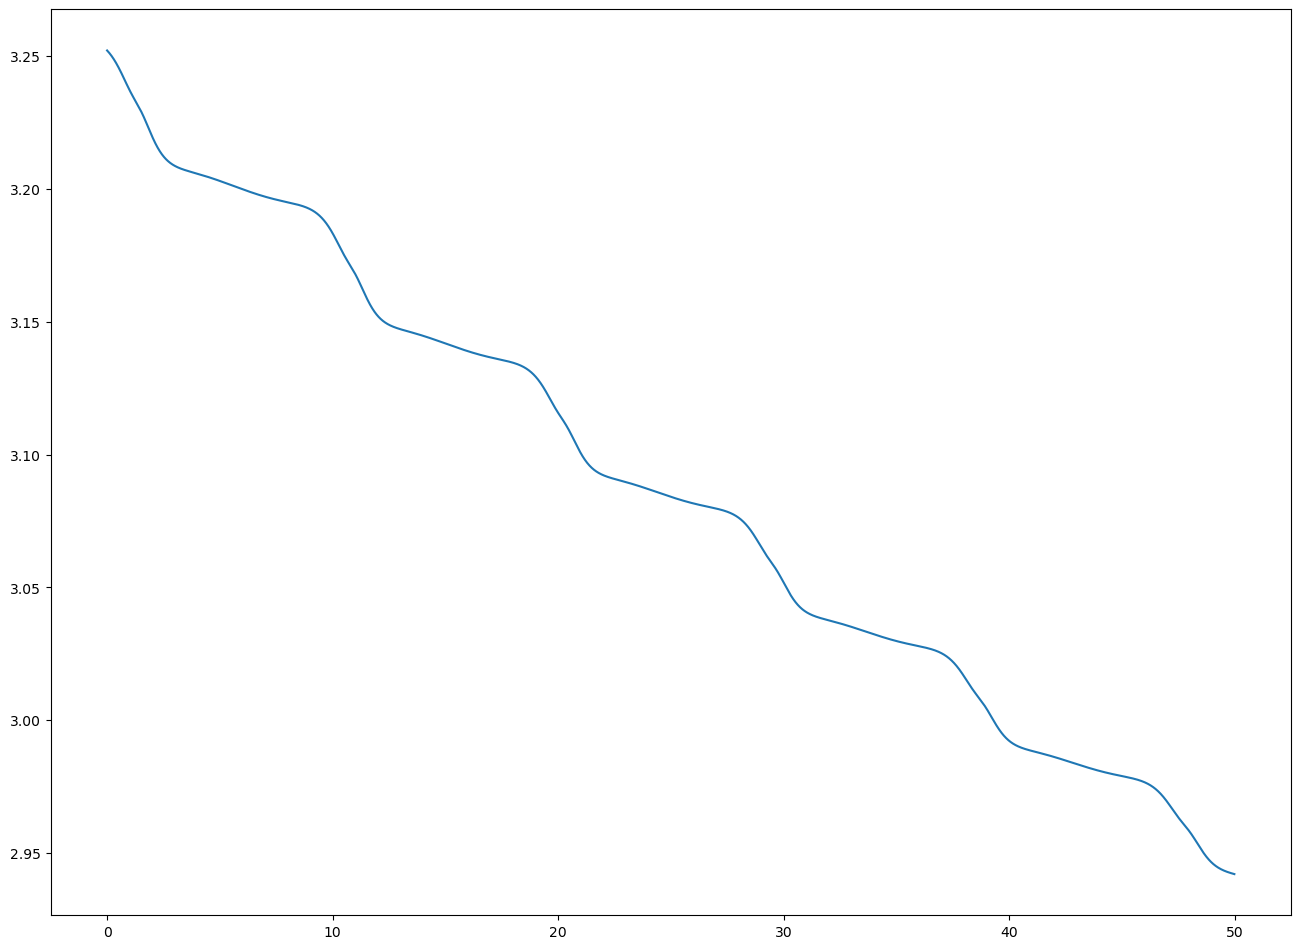

In [17]:
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]));

plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

In [35]:
def lk2(u, h, h0):
    def f(x1, x2):
        u1, u2 = u(x1, x2)
        hc = h(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

def point_eq():
    return gamma/delta,alpha/beta

In [46]:
def solve_euler_symplectic(f, x0, dt, t0, tf, itermax = 100):
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        un, vn = x[-1]
        un1 = un/(1-dt*(1-vn))
        vn1 = vn+ dt*(un1-1)
        x.append([un1, vn1])
    return t, x

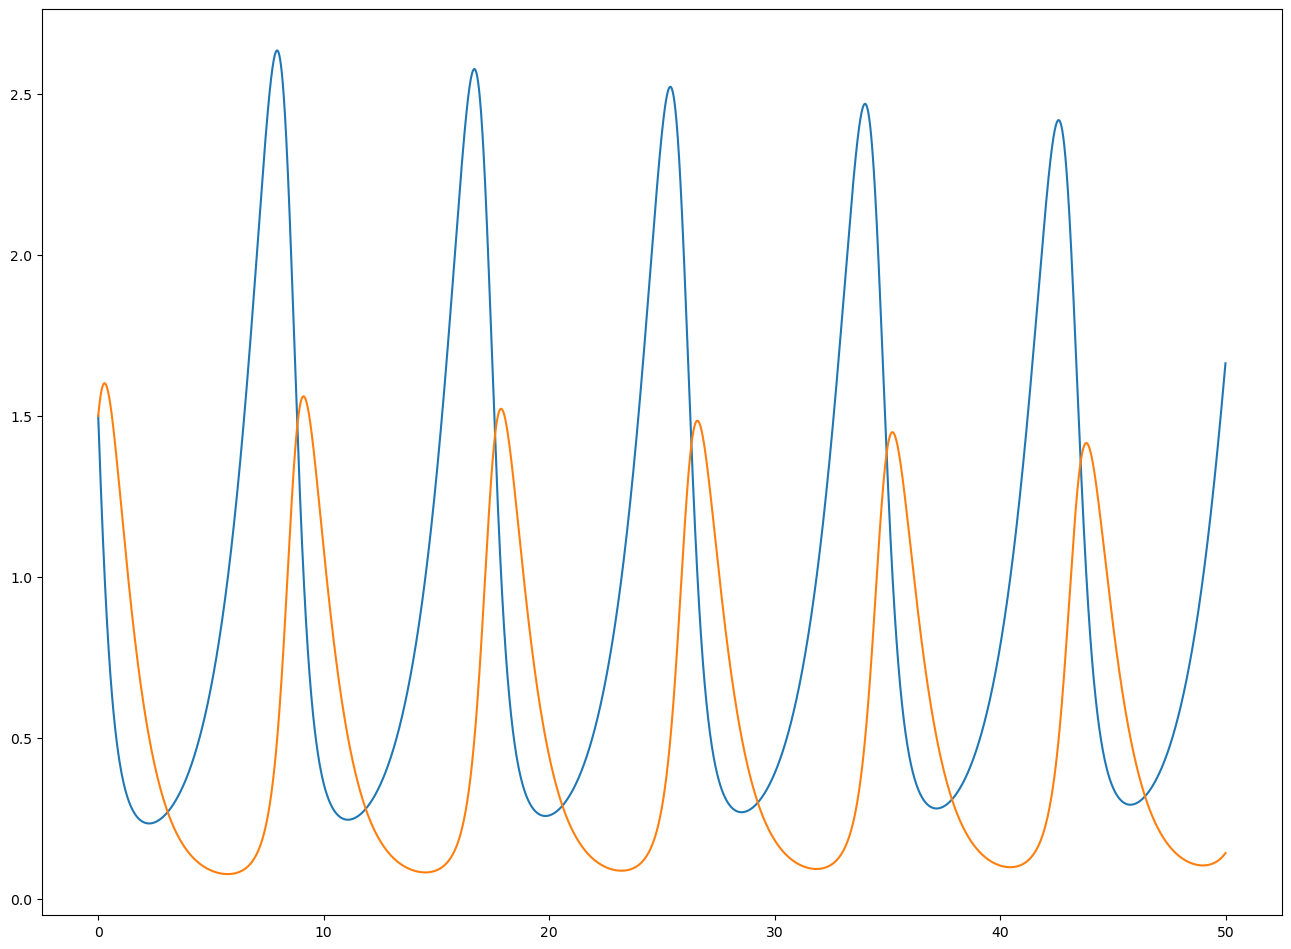

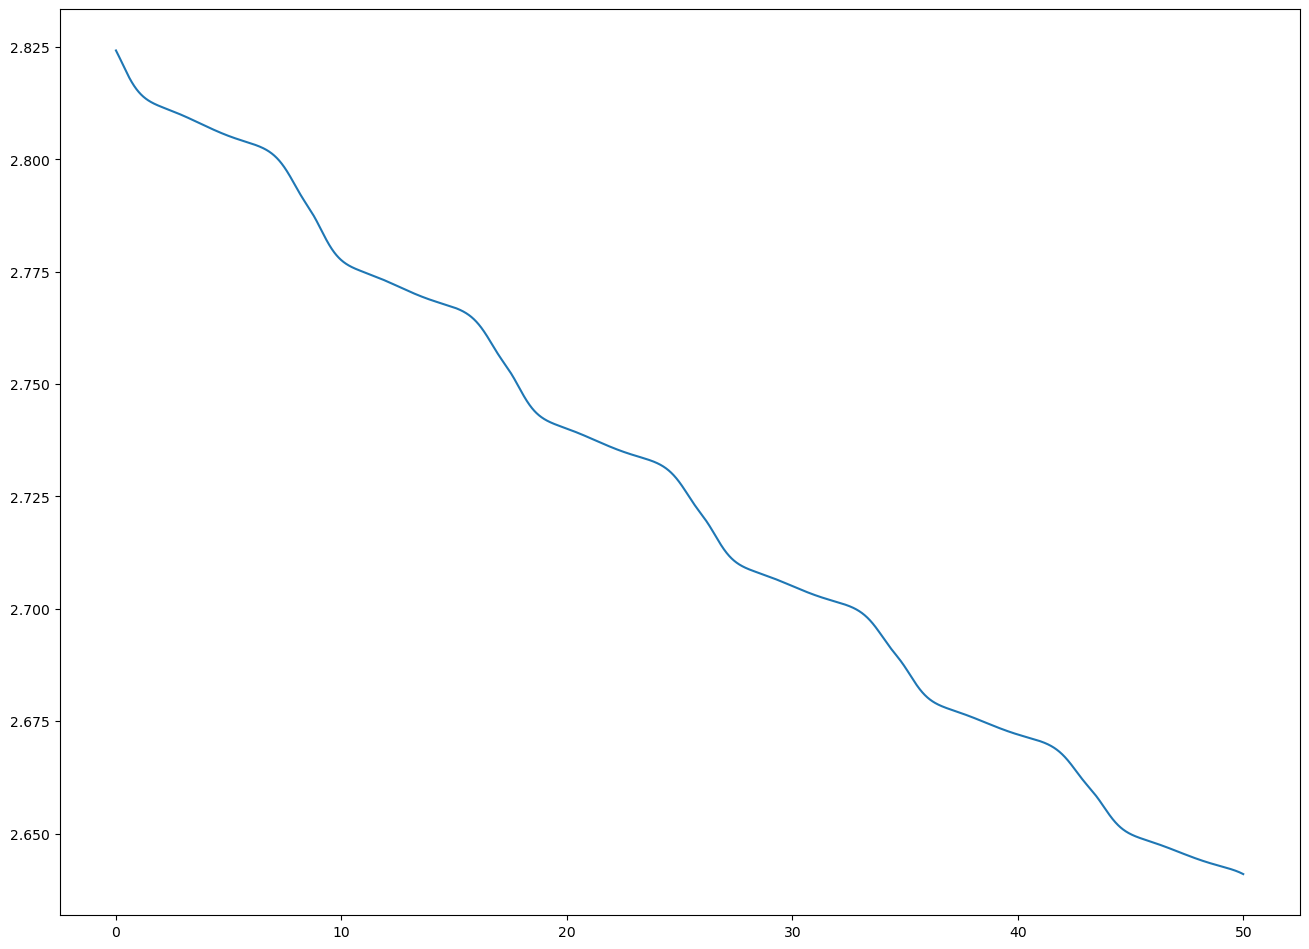

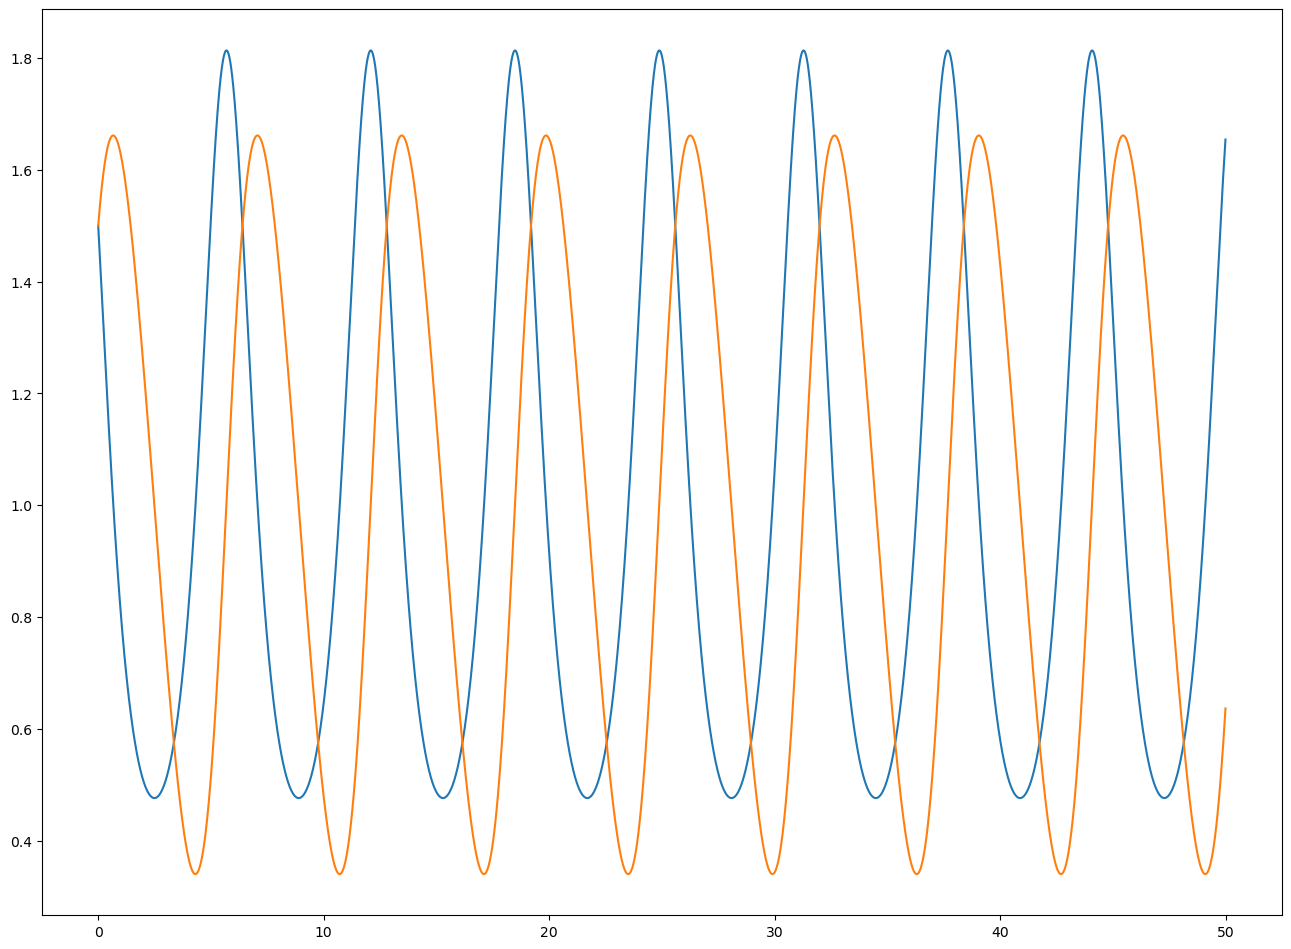

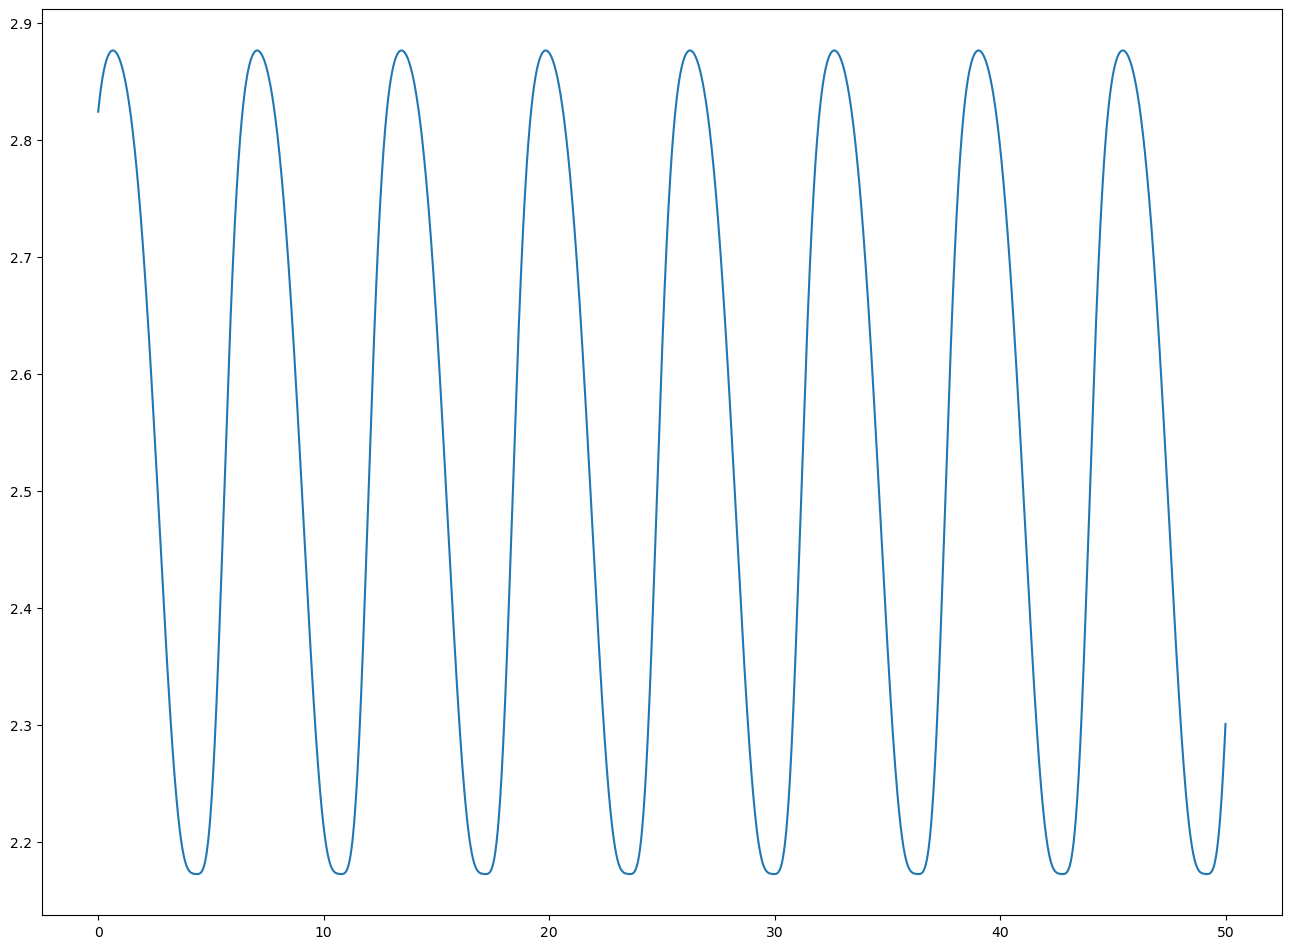

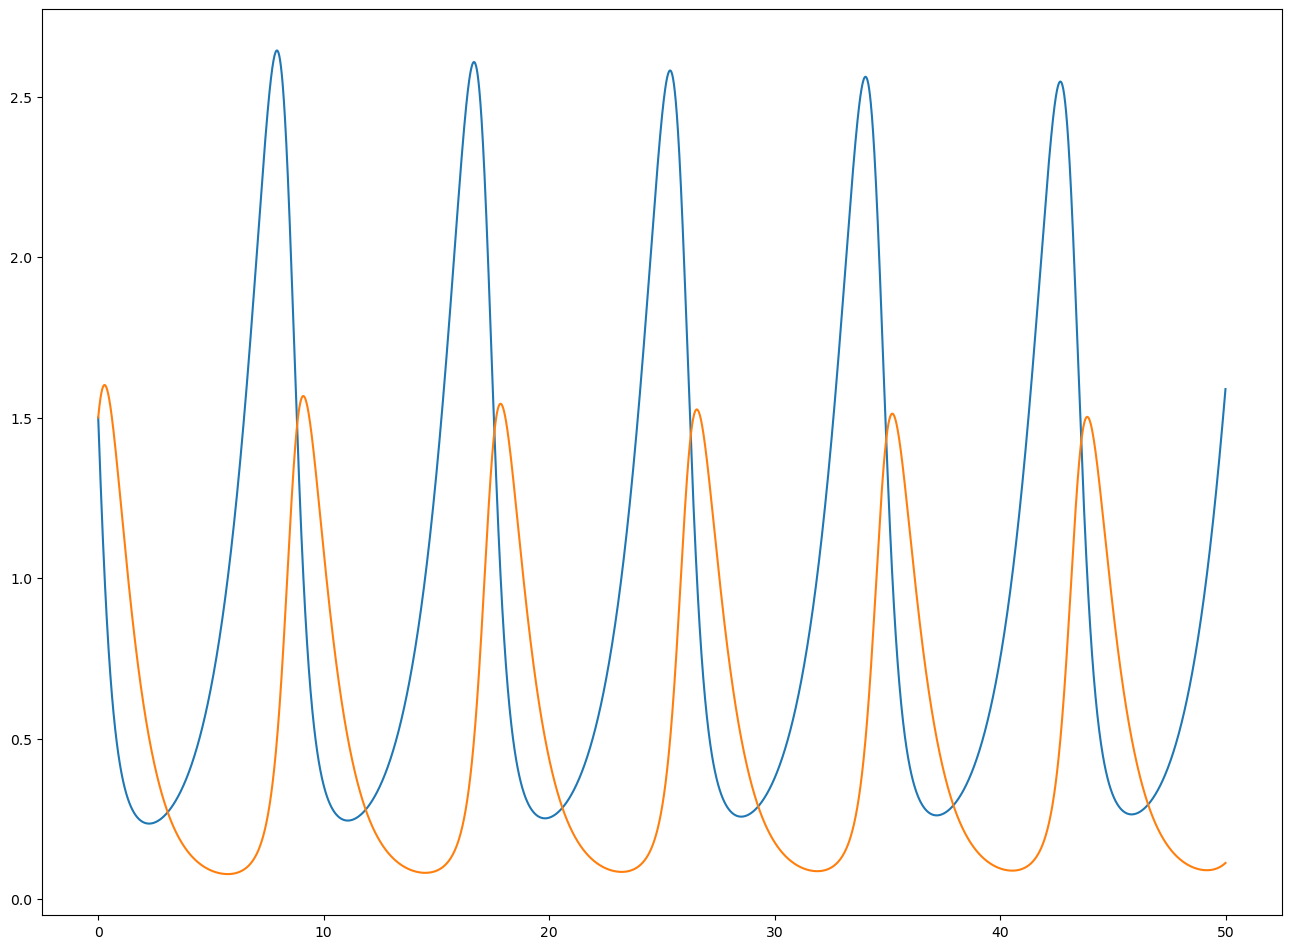

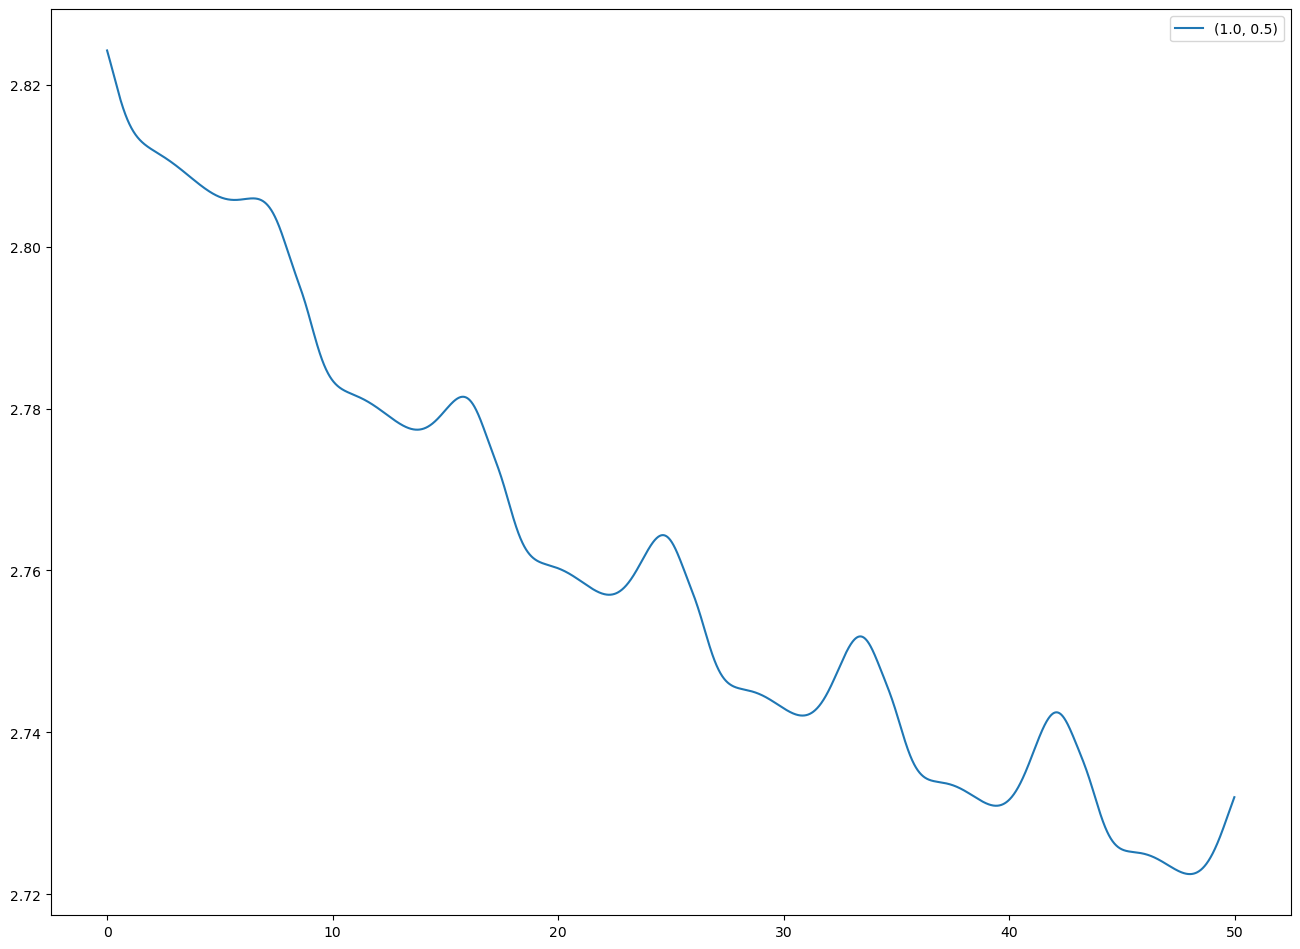

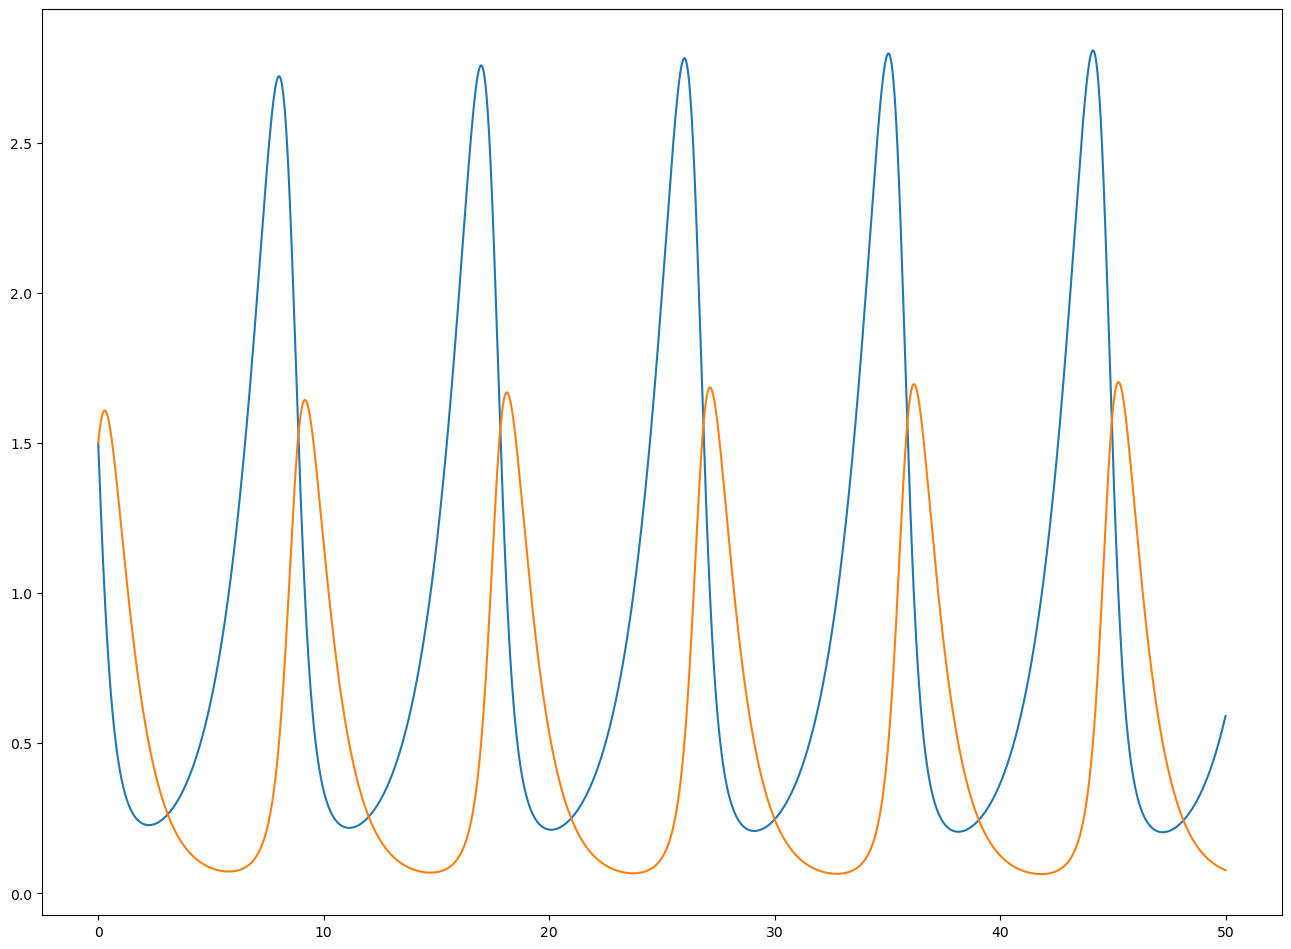

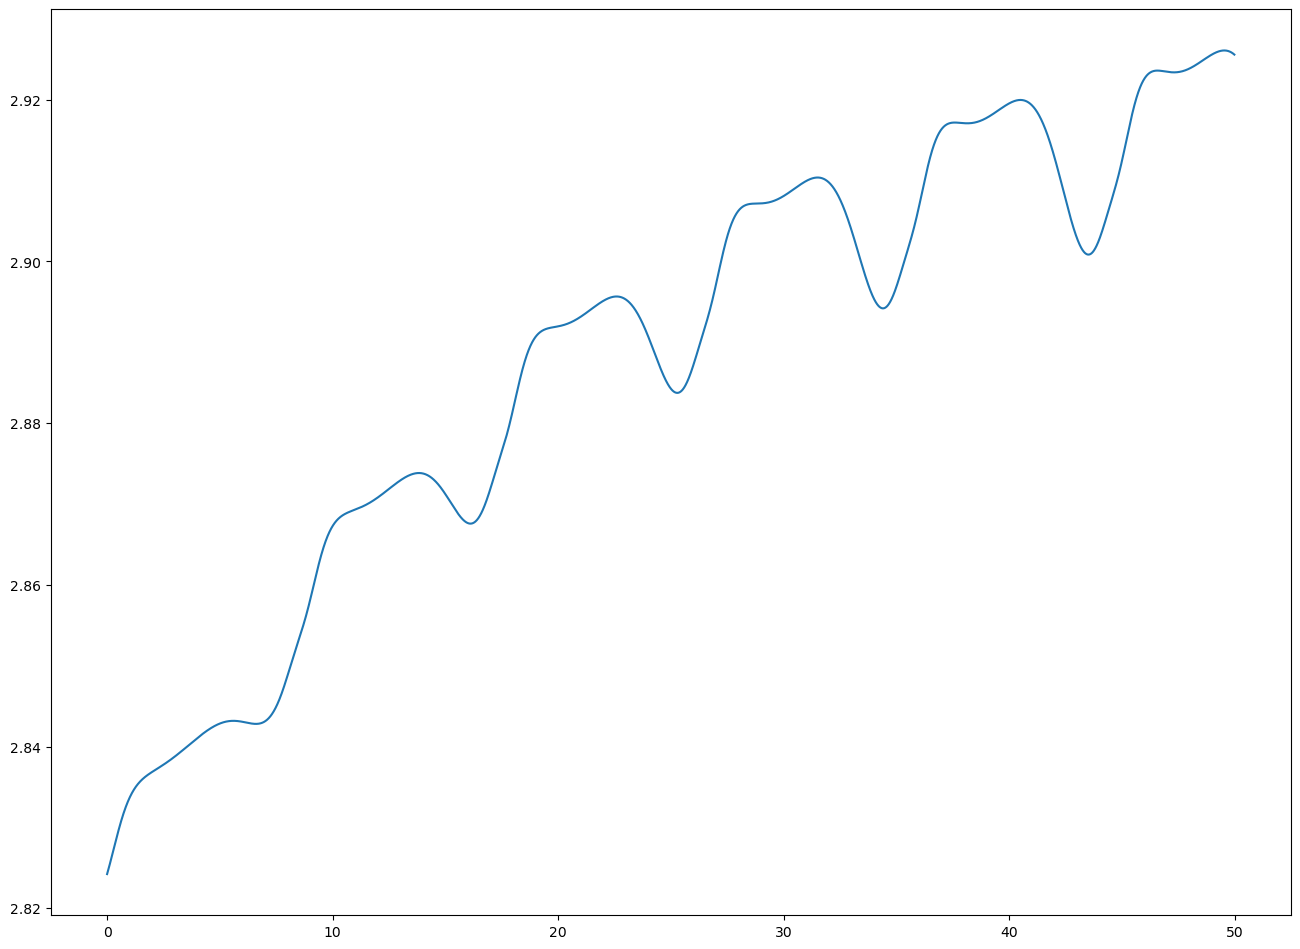

In [69]:
#x0 = [2.5,0.1]
x0=[1.5,1.5]
k=1#>= 4, 5, 10 ne fonctionne pas ; 1/50 foncitonne
#k=1/50 # entier ?
u = lambda z1, z2 : [-k*(delta-gamma/z2*z1),-k*(beta-alpha/z1*z2)]


t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

#faire un portrait de phase de la solution ? n'est pas amorti ? choix de k ?
#euler explicite pouis symplectique ... 
#attention x à une distance positive de x? sens ?


plt.figure()
t, x = solve_euler_symplectic((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante



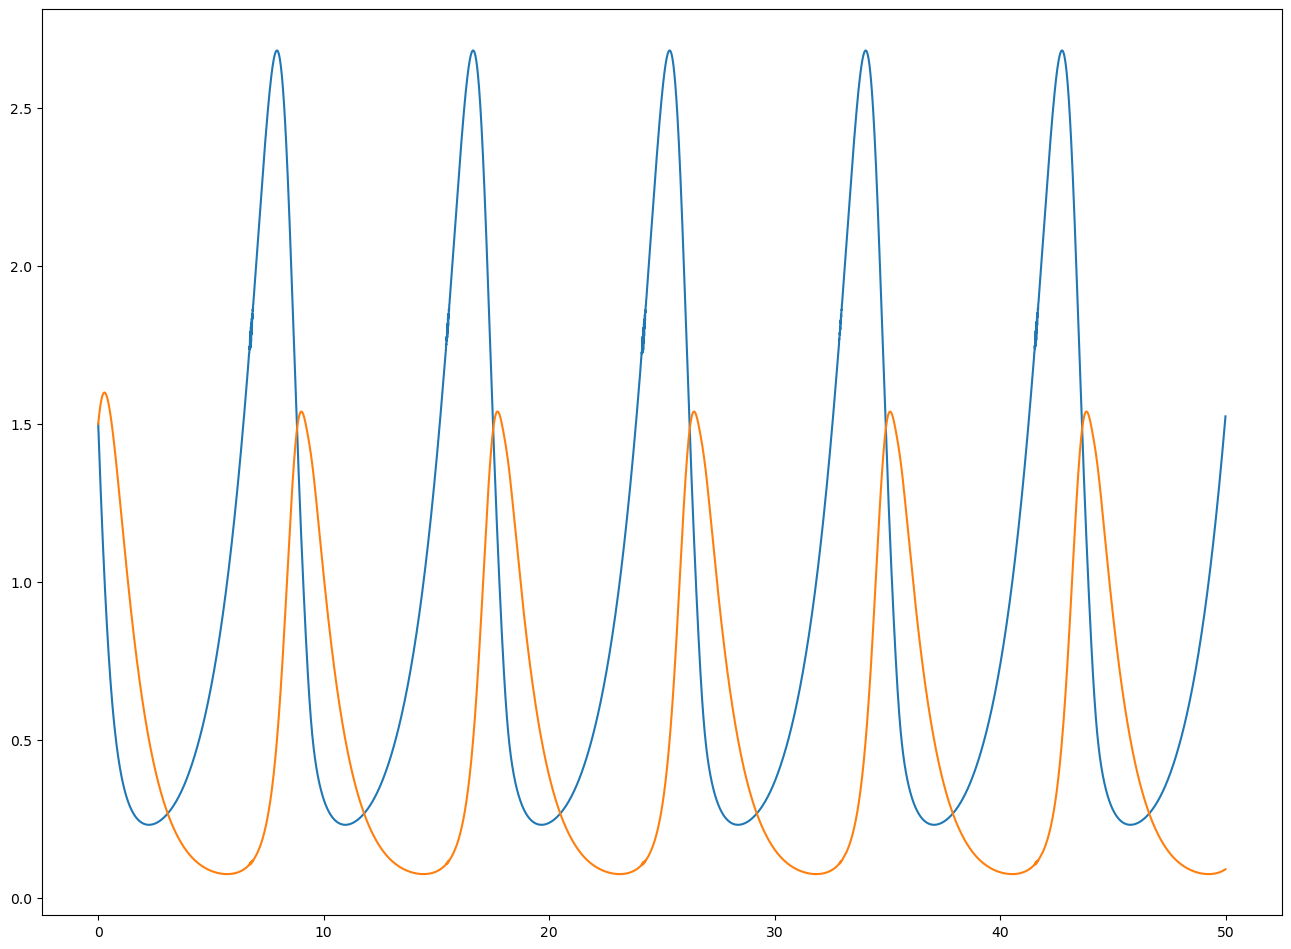

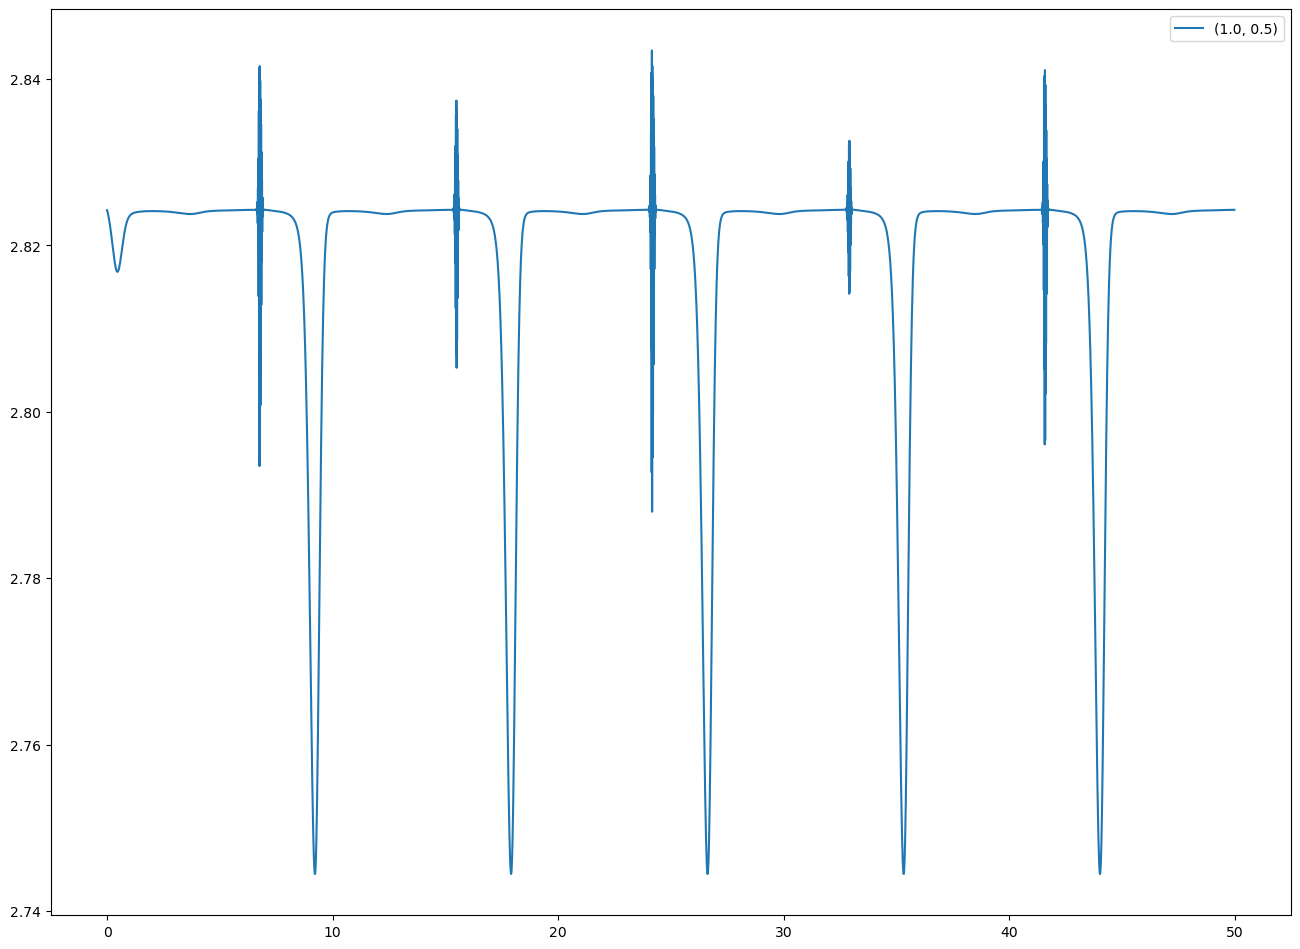

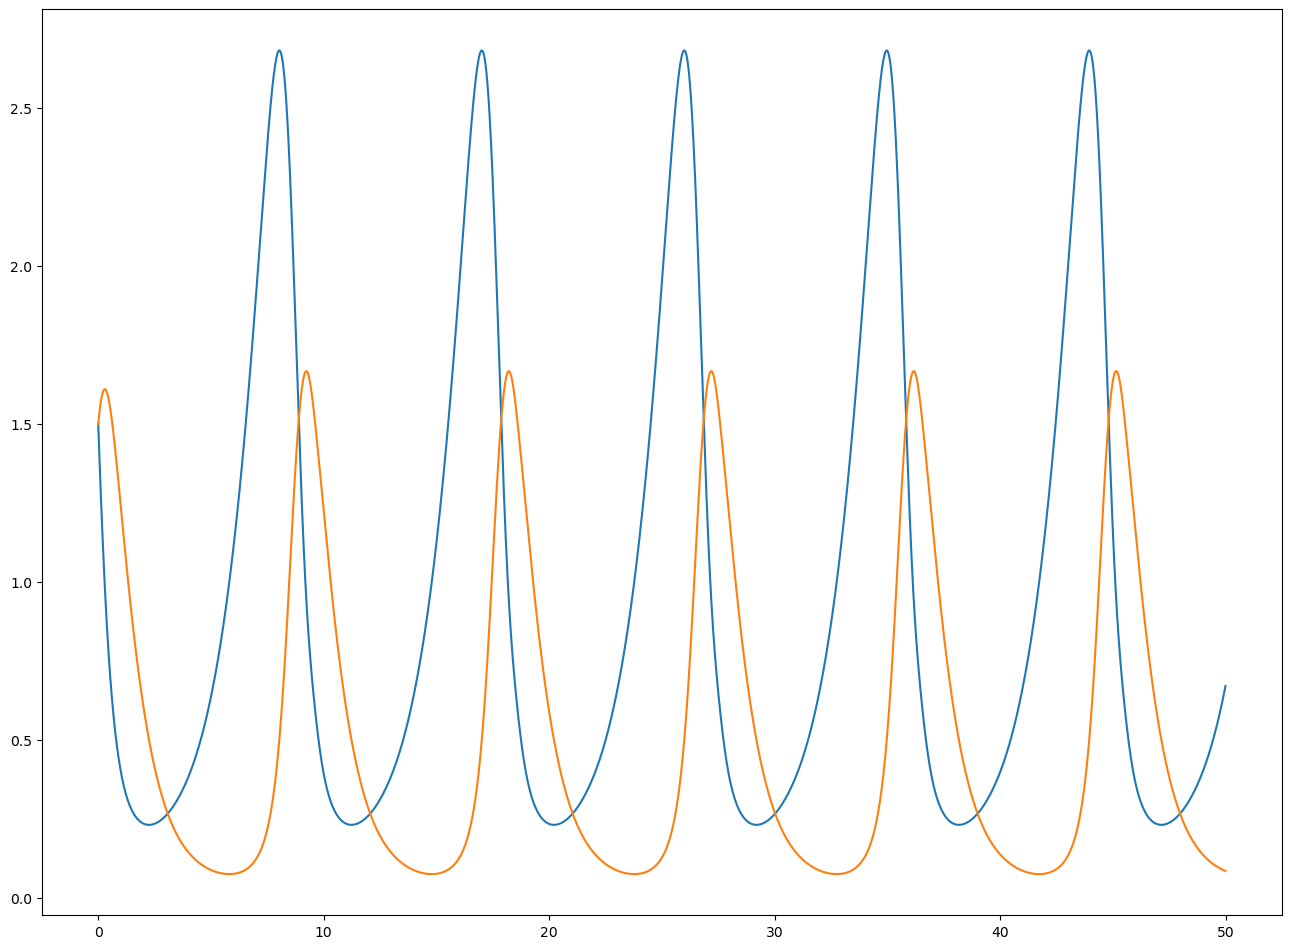

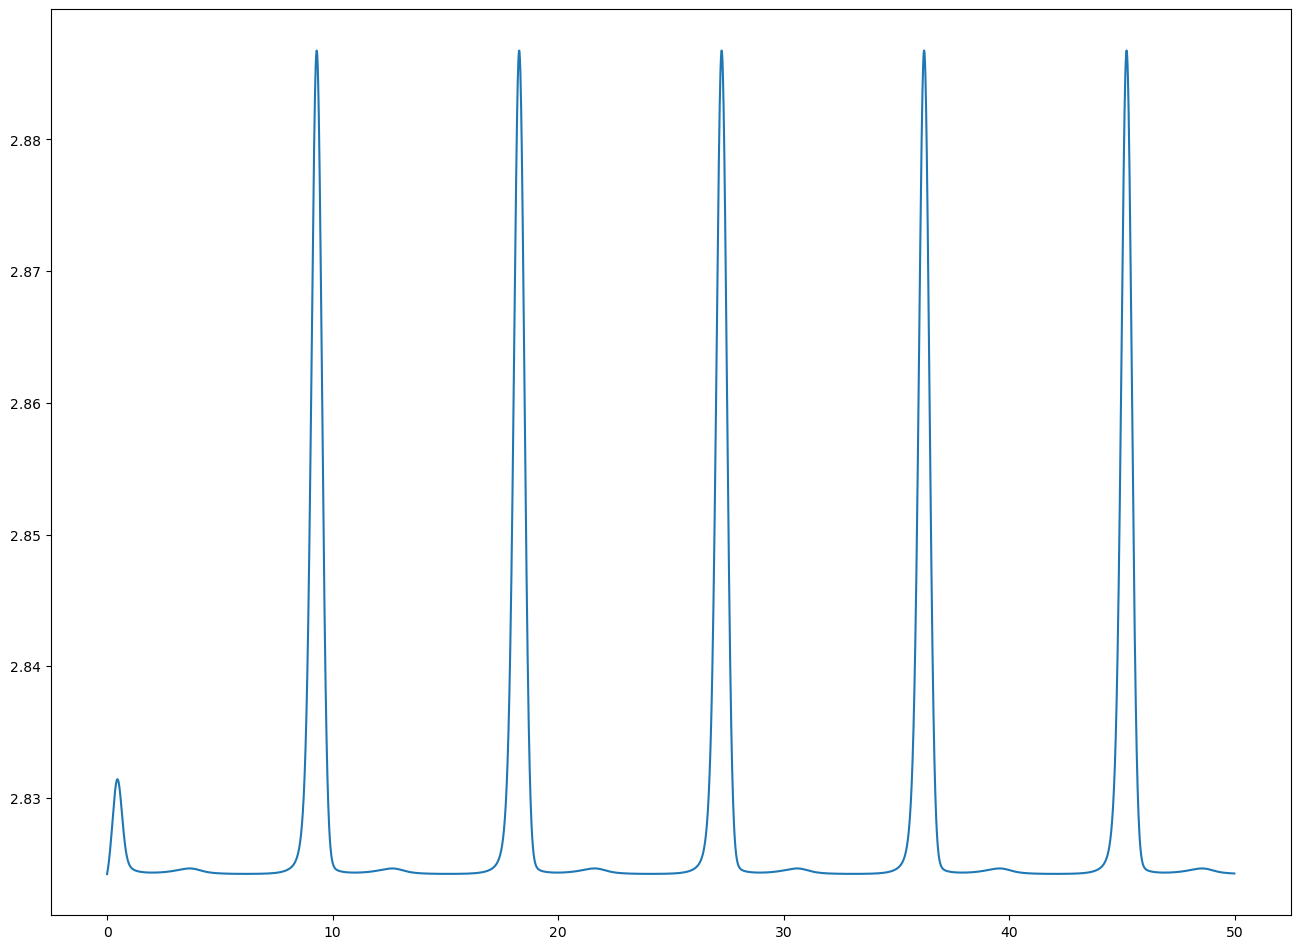

In [79]:
x0=[1.5,1.5]
k=8.7
u = lambda z1, z2 : [-k*(delta-gamma/z2*z1),-k*(beta-alpha/z1*z2)]


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante
